# DCGAN on Bricks Dataset

**The notebook has been adapted from the notebook provided in David Foster's Generative Deep Learning, 2nd Edition.**

- Book: [Amazon](https://www.amazon.com/Generative-Deep-Learning-Teaching-Machines/dp/1098134184/ref=sr_1_1?keywords=generative+deep+learning%2C+2nd+edition&qid=1684708209&sprefix=generative+de%2Caps%2C93&sr=8-1)
- Original notebook (tensorflow and keras): [Github](https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/blob/main/notebooks/04_gan/01_dcgan/dcgan.ipynb), Lincense: Apache-2.0
- Dataset: [Kaggle](https://www.kaggle.com/datasets/joosthazelzet/lego-brick-images)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import utils

import jax
import jax.numpy as jnp

import flax.linen as nn
from flax.training import train_state

## 0. Train Parameters

In [2]:
DATA_DIR = '../../data/Lego/dataset'
IMAGE_SIZE = 64
CHANNELS = 1
BATCH_SIZE = 128
Z_DIM = 100
NOISE_PARAM = 0.1
EPOCHS = 100
ADAM_BETA_1 = 0.5
ADAM_BETA_2 = 0.999
LR = 2e-4

## 1. Prepare dataset

In [3]:
# Convert images to tensors normalize them
def preprocess(img):
    img = (tf.cast(img, tf.float32) - 127.5) / 127.5
    return img

# Load lego dataset from directory
def get_dataset():
    train_ds = utils.image_dataset_from_directory(
        directory=DATA_DIR,
        labels=None,
        color_mode='grayscale',
        image_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=None,
        shuffle=True,
        seed=1024,
        interpolation='bilinear',
    ) 

    train_ds = train_ds.map(lambda sample: preprocess(sample))
    train_ds = train_ds.repeat(EPOCHS).shuffle(1024)
    train_ds = train_ds.batch(BATCH_SIZE, drop_remainder=True).prefetch(1)

    return train_ds

In [9]:
def display_imgs(imgs):
    plt.figure(figsize=(16, 3))
    for i in range(8):
        ax = plt.subplot(1, 8, i+1)
        ax.imshow(imgs[i], cmap='gray')
        ax.axis('off')
    plt.show()

Found 40000 files belonging to 1 classes.
(128, 64, 64, 1)


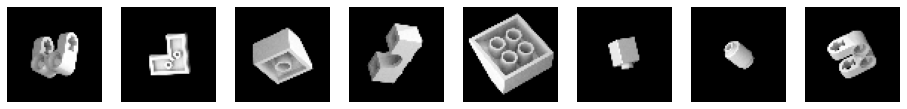

In [12]:
check_ds = get_dataset()
check_sample = next(iter(check_ds))
print(check_sample.shape)
display_imgs(check_sample)

## 2. Building GAN

In [41]:
class Discriminator(nn.Module):

    channel_list: list = (64, 128, 256, 512)
    
    @nn.compact
    def __call__(self, x, train:bool):

        # Convolutional layers
        for i, features in enumerate(self.channel_list):
            x = self.conv_block(x, features, i, train)

        # Output layers
        x = nn.Conv(features=1, kernel_size=(4, 4), strides=1, 
                    padding='valid', use_bias=False)(x)
        x = nn.sigmoid(x)
        x = x.reshape(-1, 1)
        return x

    # Downsampling convolution block
    def conv_block(self, x, out_features, use_bn, train:bool):
        x = nn.Conv(features=out_features, kernel_size=(4, 4), strides=2,
                    padding='same', use_bias=False)(x)
        
        if use_bn:
            x = nn.BatchNorm(use_running_average=not train, momentum=0.9)(x)
        x = nn.leaky_relu(x, negative_slope=0.2)
        x = nn.Dropout(rate=0.3, deterministic=not train)(x)
        return x

net_D = Discriminator()
print(net_D.tabulate(jax.random.PRNGKey(0), jnp.ones((128, 64, 64, 1)), train=False, console_kwargs={'width': 120}))


                                                 Discriminator Summary                                                  
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ path        ┃ module        ┃ inputs               ┃ outputs              ┃ params              ┃ batch_stats        ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│             │ Discriminator │ -                    │ float32[128,1]       │                     │                    │
│             │               │ float32[128,64,64,1] │                      │                     │                    │
│             │               │ - train: False       │                      │                     │                    │
├─────────────┼───────────────┼──────────────────────┼──────────────────────┼─────────────────────┼────────────────────┤
│ Conv_0      │ Conv          │

In [ ]:
class Generator(nn.Module):
    z_dim: int

    @nn.compact
    def __call__(self, x):
        pass

    def transconv_block(self, x):
        pass